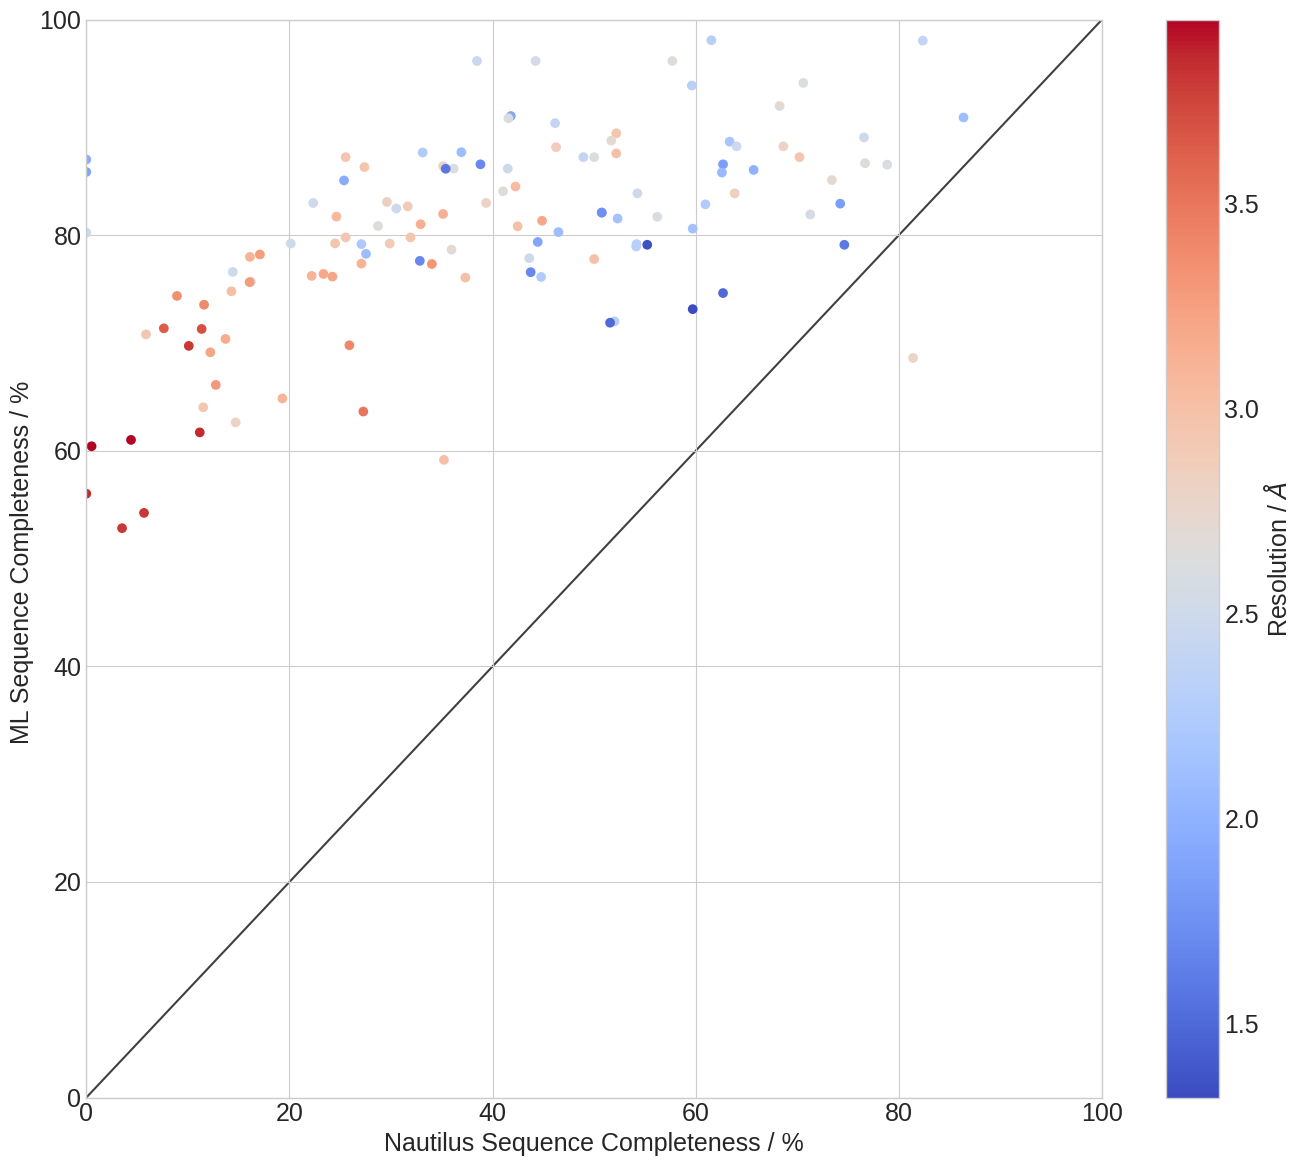

In [3]:
import matplotlib.pyplot as plt
import json 

data = None
with open("../tests/test_model/model_result.json", "r", encoding="UTF-8") as output_file:
    data = json.load(output_file)
    
res = None
with open("../tests/test_model/resolutions.json", "r", encoding="UTF-8") as res_file:
    res = json.load(res_file)

plt.style.use('seaborn-v0_8-whitegrid')
font = {'size'   : 18}
plt.rc('font', **font)

fig, ax2 = plt.subplots(1, figsize=(14,12))
for x in data.keys(): 
    path = f"/home/jordan/dev/nautilus/tests/test_modelcraft/base/completeness_files/{x}.json"
        
    with open(path, "r") as file_:
        c = json.load(file_)
        data[x]["nautilus_base_seq"] = 100* c["nucleic_sequenced"]/c["nucleic_total"]
       
for k in data.keys():
    data[k]["pdb"] = k
    
data = sorted(data.values(), reverse=True, key=lambda x: x["completeness"])
names = [x["pdb"] for x in data]

completeness = [x["completeness"] for x in data]

resolutions = [res[x["pdb"]] for x in data]

nautilus_base = [x["nautilus_base_seq"] for x in data]
sc = ax2.scatter(nautilus_base, completeness, c=resolutions, cmap=plt.cm.coolwarm)

ax2.set_xlim((0,100))
ax2.set_ylim((0,100))
lims = [
0,100# max of both axes
]

# now plot both limits against eachother
cbar = fig.colorbar(sc, ax = ax2)
cbar.set_label('Resolution / $\AA$')

ax2.plot(lims, lims, 'k-', alpha=0.75, zorder=0)

ax2.set_xlabel("Nautilus Sequence Completeness / %")
ax2.set_ylabel("ML Sequence Completeness / % ")
plt.margins(x=10, y=10)

plt.tight_layout()
# plt.savefig("tests/test_model/nautilus_vs_new.png", dpi=400)
plt.show()
